In [1]:
import pandas as pd

# Load the data into a dataframe
df = pd.read_csv('data/2019_ipl_ball_by_ball.csv')

# Compute the batting statistics
batting_df = df.groupby(['batter', 'Venue']).agg({'batsman_run': 'sum', 'ballnumber': 'count', 'isWicketDelivery': 'sum'}).reset_index()
batting_df.rename(columns={'batsman_run': 'runs_scored', 'ballnumber': 'balls_faced', 'isWicketDelivery': 'times_out'}, inplace=True)
batting_df['batting_average'] = batting_df['runs_scored'] / batting_df['times_out']
batting_df['batting_strike_rate'] = batting_df['runs_scored'] / batting_df['balls_faced']

# Compute the bowling statistics
bowling_df = df.groupby(['bowler', 'Venue']).agg({'isWicketDelivery': 'sum', 'total_run': 'sum', 'ballnumber': 'count'}).reset_index()
bowling_df.rename(columns={'isWicketDelivery': 'wickets_taken', 'total_run': 'runs_conceded', 'ballnumber': 'balls_bowled'}, inplace=True)
bowling_df['bowling_average'] = bowling_df['runs_conceded'] / bowling_df['wickets_taken']
bowling_df['bowling_strike_rate'] = bowling_df['balls_bowled'] / bowling_df['wickets_taken']

# Merge the batting and bowling dataframes
merged_df = pd.merge(batting_df, bowling_df, left_on=['batter', 'Venue'], right_on=['bowler', 'Venue'], how='outer')
merged_df['player'] = merged_df['batter'].fillna(merged_df['bowler']).fillna('Unknown')


# Create a final dataframe that combines the batting and bowling stats for each player at each venue
final_df = pd.DataFrame(columns=['player', 'venue', 'runs scored at that venue', 'batting average at that venue', 'batting strike rate at that venue', 'wickets taken at that venue', 'bowling average at that venue', 'bowling strike rate at that venue'])

final_df['player'] = merged_df['batter']
final_df['venue'] = merged_df['Venue']
final_df['runs scored at that venue'] = merged_df['runs_scored']
final_df['batting average at that venue'] = merged_df['batting_average']
final_df['batting strike rate at that venue'] = merged_df['batting_strike_rate']
final_df['wickets taken at that venue'] = merged_df['wickets_taken']
final_df['bowling average at that venue'] = merged_df['bowling_average']
final_df['bowling strike rate at that venue'] = merged_df['bowling_strike_rate']

final_df.drop_duplicates(inplace=True)
#print(final_df)
final_dict = final_df.to_dict('records')
#print(final_dict)
final_dict = {index: row for index, row in final_df.iterrows() if not pd.isna(row['player'])}
print(final_dict)





{0: player                                           A Mishra
venue                                Arun Jaitley Stadium
runs scored at that venue                             6.0
batting average at that venue                         inf
batting strike rate at that venue                0.666667
wickets taken at that venue                           9.0
bowling average at that venue                   19.666667
bowling strike rate at that venue               15.666667
Name: 0, dtype: object, 1: player                                                                        A Mishra
venue                                Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...
runs scored at that venue                                                          7.0
batting average at that venue                                                      7.0
batting strike rate at that venue                                             1.166667
wickets taken at that venue                                           

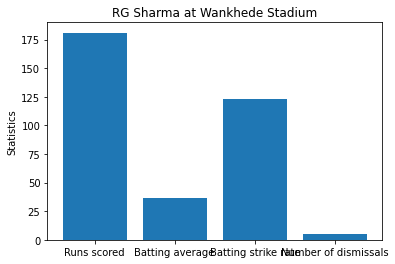

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data from CSV file
df = pd.read_csv('data/2019_ipl_ball_by_ball.csv')

# Filter the data for Yuvraj Singh and Wankhede stadium
yuvraj_wankhede_df = df[(df['batter'] == 'RG Sharma') & (df['Venue'] == 'Wankhede Stadium')]

# Calculate the batting average and strike rate for Yuvraj Singh at Wankhede stadium
runs_scored = yuvraj_wankhede_df['batsman_run'].sum()
balls_faced = yuvraj_wankhede_df[yuvraj_wankhede_df['isWicketDelivery'] != 1]['ballnumber'].count()
batting_average = runs_scored / yuvraj_wankhede_df['player_out'].count()
batting_strike_rate = runs_scored / balls_faced * 100

# Create a bar chart for Yuvraj Singh at Wankhede stadium
labels = ['Runs scored', 'Batting average', 'Batting strike rate', 'Number of dismissals']
values = [runs_scored, batting_average, batting_strike_rate, yuvraj_wankhede_df['player_out'].count()]

fig, ax = plt.subplots()
ax.bar(labels, values)

ax.set_title('RG Sharma at Wankhede Stadium')
ax.set_ylabel('Statistics')
ax.set_xlabel('')

plt.show()


In [5]:
import plotly.express as px

# Filter the dataframe to only include Yuvraj Singh's data at all venues
yuvi_df = final_df[(final_df['player'] == 'RG Sharma')]

yuvi_df = yuvi_df.reset_index()

#print(batting_avg_df)
#print(yuvi_df)


yuvi_df= yuvi_df.rename(columns={0: 'battingaverage'})

#print(yuvi_df)


# Create a bar chart of runs scored at each venue
fig = px.bar(yuvi_df, x='venue', y='runs scored at that venue', color='venue', title='Runs scored by RG Sharma')
fig.show()


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

# Read in the data
df = pd.read_csv('data/2019_ipl_ball_by_ball.csv')

# Filter the data for Yuvraj Singh only
yuvi_df = df[df['batter'] == 'RG Sharma']

# Calculate the batting average at each venue for Yuvraj Singh
batting_avg_df = yuvi_df.groupby(['Venue'])['batsman_run'].sum() / yuvi_df.groupby(['Venue'])['player_out'].count()

batting_avg_df = batting_avg_df.reset_index()

#print(batting_avg_df)

batting_avg_df = batting_avg_df.rename(columns={0: 'battingaverage'})

#print(batting_avg_df)


# Create the Plotly graph
fig = px.bar(batting_avg_df, x='Venue', y='battingaverage', color='Venue', title='Batting average for RG Sharma')
fig.show()

# # Plot the batting average at each venue for Yuvraj Singh
# plt.bar(batting_avg_df.index, batting_avg_df.values)
# plt.title("Batting Average for Yuvraj Singh at Each Venue")
# plt.xlabel("Venue")
# plt.ylabel("Batting Average")
# plt.xticks(rotation=90)

# plt.show()


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px


# Read in the data
df = pd.read_csv('data/2019_ipl_ball_by_ball.csv')

# Filter the data for Yuvraj Singh only
yuvi_df = df[df['batter'] == 'RG Sharma']

# Calculate the batting strike rate at each venue for Yuvraj Singh
balls_faced = yuvi_df.groupby(['Venue'])['batter'].count()
runs_scored = yuvi_df.groupby(['Venue'])['batsman_run'].sum()
batting_sr_df = (runs_scored / balls_faced) * 100

batting_sr_df = batting_sr_df.reset_index()

#print(batting_avg_df)
#print(batting_sr_df)


batting_sr_df = batting_sr_df.rename(columns={0: 'battingstrikerate'})

#print(batting_sr_df)


# Create the Plotly graph
fig = px.bar(batting_sr_df, x='Venue', y='battingstrikerate', color='Venue', title='Batting strike rate for RG Sharma')
fig.show()

# Plot the batting strike rate at each venue for Yuvraj Singh
# plt.bar(batting_sr_df.index, batting_sr_df.values)
# plt.title("Batting Strike Rate for Yuvraj Singh at Each Venue")
# plt.xlabel("Venue")
# plt.ylabel("Batting Strike Rate")
# plt.xticks(rotation=90)

# plt.show()




In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Read in the data
df = pd.read_csv('data/2019_ipl_ball_by_ball.csv')

# Filter the data for Imran Tahir only
tahir_df = df[df['bowler'] == 'Imran Tahir']

# Calculate the economy rate at each venue for Imran Tahir
economy_rate_df = tahir_df.groupby(['Venue'])['total_run'].sum() / (tahir_df.groupby(['Venue'])['overs'].sum() // 60)
# print(economy_rate_df)


economy_rate_df = economy_rate_df.reset_index()

#print(batting_avg_df)
#print(batting_sr_df)


economy_rate_df = economy_rate_df.rename(columns={0: 'economy'})

#print(batting_sr_df)


# Create the Plotly graph
fig = px.bar(economy_rate_df, x='Venue', y='economy', color='Venue', title='economy for imran tahir')
fig.show()


# Plot the economy rate at each venue for Imran Tahir
# plt.bar(economy_rate_df.index, economy_rate_df.values)
# plt.title("Economy Rate for Imran Tahir at Each Venue")
# plt.xlabel("Venue")
# plt.ylabel("Economy Rate")
# plt.xticks(rotation=90)

# plt.show()


In [10]:
import pandas as pd
import matplotlib.pyplot as plt

#Read in the data
df = pd.read_csv('data/2019_ipl_ball_by_ball.csv')

#Filter the data for Imran Tahir only
imran_df = df[df['bowler'] == 'Imran Tahir']

#Count the number of wickets taken by Imran Tahir at each venue
wickets_df = imran_df.groupby(['Venue'])['player_out'].count()

wickets_df = wickets_df.reset_index()

#print(batting_avg_df)
#print(batting_sr_df)


wickets_df = wickets_df.rename(columns={0: 'wicketstaken'})

#print(batting_sr_df)


# Create the Plotly graph
fig = px.bar(wickets_df, x='Venue', y='player_out', color='Venue', title='wickets for imran tahir')
fig.show()

# #Plot the number of wickets taken by Imran Tahir at each venue
# plt.bar(wickets_df.index, wickets_df.values)
# plt.title("Wickets taken by Imran Tahir at each Venue")
# plt.xlabel("Venue")
# plt.ylabel("Number of Wickets")
# plt.xticks(rotation=90)

# plt.show()

In [11]:
import ipywidgets as widgets

# Create a list of unique players and venues
players = final_df['player'].unique()
venues = final_df['venue'].unique()

# Create dropdown widgets for player and venue
player_dropdown = widgets.Dropdown(options=players, description='Player:')
venue_dropdown = widgets.Dropdown(options=venues, description='Venue:')

# Define a function to display player statistics
def display_stats(player, venue):
    # Filter the final_df dataframe based on the selected player and venue
    filtered_df = final_df[(final_df['player'] == player) & (final_df['venue'] == venue)]
    if not filtered_df.empty:
        # If there are records for the selected player and venue, display the statistics
        runs_scored = filtered_df['runs scored at that venue'].iloc[0]
        batting_avg = filtered_df['batting average at that venue'].iloc[0]
        batting_strike_rate = filtered_df['batting strike rate at that venue'].iloc[0]
        wickets_taken = filtered_df['wickets taken at that venue'].iloc[0]
        bowling_avg = filtered_df['bowling average at that venue'].iloc[0]
        bowling_strike_rate = filtered_df['bowling strike rate at that venue'].iloc[0]
        print('Player: {}'.format(player))
        print('Venue: {}'.format(venue))
        print('Runs scored: {}'.format(runs_scored))
        print('Batting average: {}'.format(batting_avg))
        print('Batting strike rate: {}'.format(batting_strike_rate))
        print('Wickets taken: {}'.format(wickets_taken))
        print('Bowling average: {}'.format(bowling_avg))
        print('Bowling strike rate: {}'.format(bowling_strike_rate))
    else:
        # If there are no records for the selected player and venue, display a message
        print('No records found for the selected player and venue')

# Define a function to update the player statistics when a player or venue is selected
def update_stats(*args):
    display_stats(player_dropdown.value, venue_dropdown.value)

# Register the update_stats function to be called when the player or venue dropdown value changes
player_dropdown.observe(update_stats, 'value')
venue_dropdown.observe(update_stats, 'value')

# Display the player and venue dropdowns
display(widgets.VBox([player_dropdown, venue_dropdown]))


ModuleNotFoundError: No module named 'ipywidgets'